# Sales Analysis


In this Project we have 12 months worth of sales dat, The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. and we will try to answer some question like :
<ul>
    <li>What was the best month for sales ?</li>
    <li>what was the best city for sales ?</li>
</ul>

## import necessery libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Merging 12 month of sales data into a single file 

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_data = pd.DataFrame()
for file in files:
    x = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data, x])
# make a sort by date 
all_data.to_csv('all_data.csv', index=False)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


## Clean up the data!

In [3]:
nan_rows = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## convert column to the correct type 

In [4]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Add Month column

In [5]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8
...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",4
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",4
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",4
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",4


## add Sales column 

In [6]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


# Task 1 : what was the best month for sales ? 

In [7]:
result =  all_data.groupby('Month').sum()['Sales']

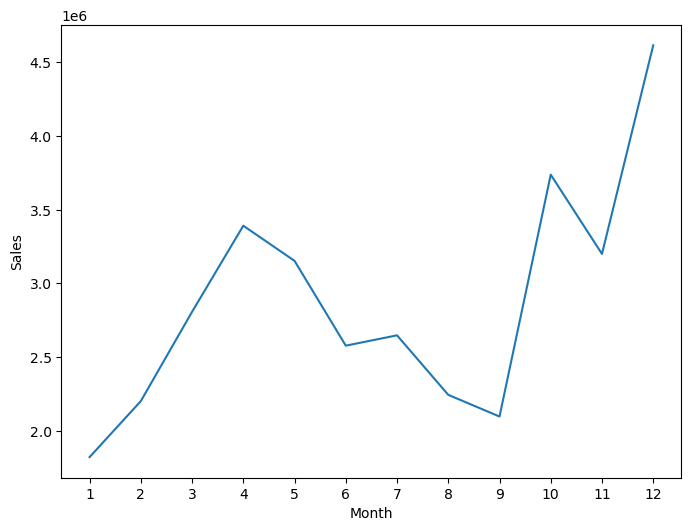

In [8]:
plt.figure(figsize=(8, 6), dpi=100)
plt.ylabel('Sales')
result.plot()
plt.xticks(range(1,13))
plt.show()

as we see from the line chart : the best month for sales was **December**

# Task 1 : what was the best city for sales ?

### creat a city column states

In [9]:
def get_state(y):
    return y.split(sep=',')[2].split(sep=' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(sep=',')[1] + ' ' + get_state(x))
## see actualy "apply" does 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [10]:
result2 = all_data.groupby('City').sum()['Sales']

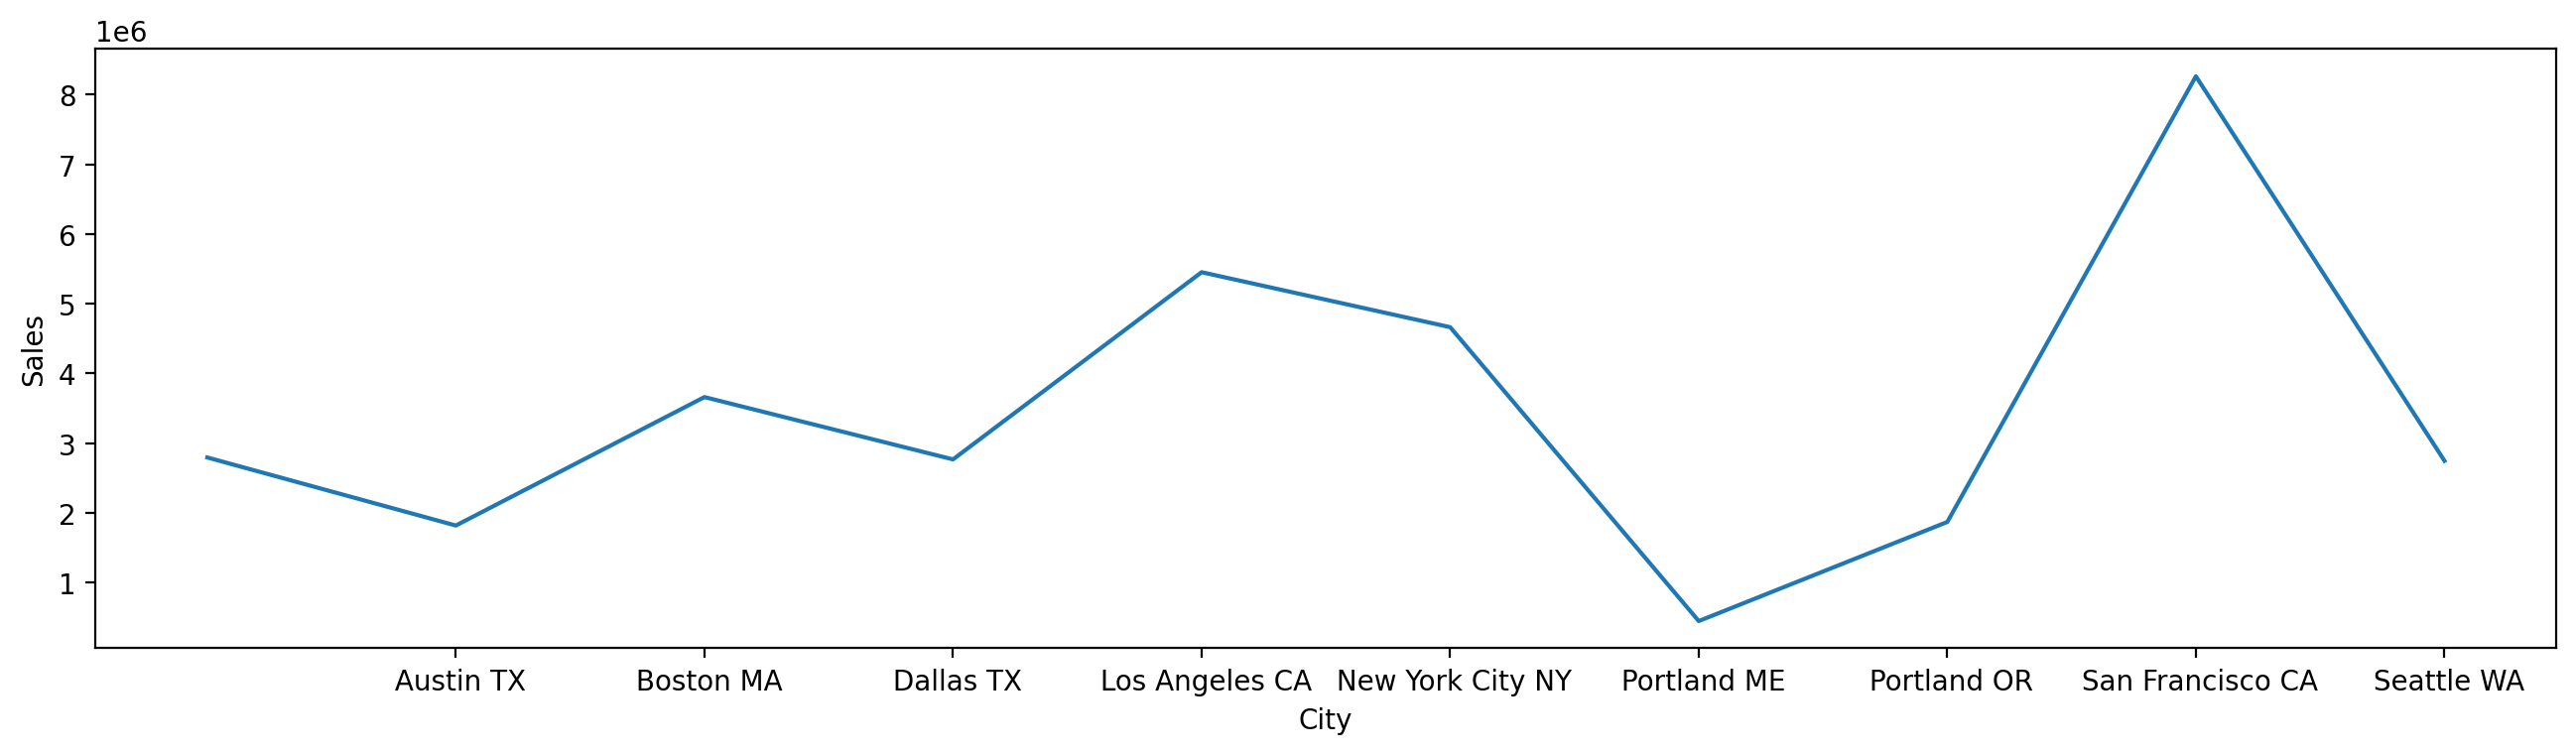

In [11]:
cities = len(all_data['City'].unique())
plt.figure(figsize=(16, 4), dpi=200)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Sales')
plt.grid()
result2.plot()
plt.show()

as we see from the line chart : the best city for saling was **San Francisco**